# Homework: Data Analysis with the Titanic Dataset 

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

## A. Data Structures & Types
1. Load the Titanic dataset and display the first 5 rows.
2. Print `.info()` and `.describe()`.
3. Identify categorical vs numerical variables, print a list of each type.
4. Convert the `sex` column into a categorical data type.

In [2]:
# 1. Load the Titanic dataset and display the first 5 rows.
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
# 2. Print `.info()` and `.describe()`.
titanic.info()
titanic.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
count,891.000000,891.000000,891,714.000000,891.000000,891.000000,891.000000,889,891,891,891,203,889,891,891
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3,3,3,2,7,3,2,2
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S,Third,man,True,C,Southampton,no,True
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,644,491,537,537,59,644,549,537
mean,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,32.204208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.486592,0.836071,NaN,14.526497,1.102743,0.806057,49.693429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.000000,2.000000,NaN,20.125000,0.000000,0.000000,7.910400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,14.454200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.000000,3.000000,NaN,38.000000,1.000000,0.000000,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# 3. Identify categorical vs numerical variables, print a list of each type.
# Assuming categorical variables are of type 'category'(not 'object'), and numerical are 'int' or 'float'.
categorical_vars = titanic.select_dtypes(include=['category']).columns.tolist()
numerical_vars = titanic.select_dtypes(include=['number']).columns.tolist()
print("Categorical Variables:", categorical_vars)
print("Numerical Variables:", numerical_vars)

Categorical Variables: ['class', 'deck']
Numerical Variables: ['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare']


In [5]:
# 4. Convert the `sex` column into a categorical data type.
titanic['sex'] = titanic['sex'].astype('category')
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    category
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(3), float64(2), int64(4), object(4)
memory usage: 74.7+ KB


## B. Selecting / Filtering / Grouping Data
1. Select all passengers younger than 18 years old. How many survived?
2. Compute the survival rate of 3rd class passengers.
3. Group by sex and class, compute average survival rate.
4. Find the most common embarkation port among survivors.
5. What is the average fare? What is the median? Which makes more sense to use in this case?

In [6]:
# 1. Select all passengers younger than 18 years old. How many survived?
young_passengers = titanic[titanic['age'] < 18]
survived_count = young_passengers['survived'].sum()
print(f"younger than 18 years old survivor: {survived_count}")


younger than 18 years old survivor: 61


In [7]:
# 2. Compute the survival rate of 3rd class passengers.
third_class_passengers = titanic[titanic['class'] == 'Third']
third_class_survival_rate = third_class_passengers['survived'].mean()
print(f"3rd class survival rate: {third_class_survival_rate:.2%}")

3rd class survival rate: 24.24%


In [8]:
# 3. Group by sex and class, compute average survival rate.
# Group by sex and class separately
sex_survival = titanic.groupby('sex')['survived'].mean()
print("Average survival rate by sex:")
print(sex_survival)

class_survival = titanic.groupby('class')['survived'].mean()
print("\nAverage survival rate by class:")
print(class_survival)

# Group by both sex and class
grouped_survival = titanic.groupby(['sex', 'class'])['survived'].mean()
print("\nAverage survival rate by sex and class:")
print(grouped_survival)

Average survival rate by sex:
sex
female    0.742038
male      0.188908
Name: survived, dtype: float64

Average survival rate by class:
class
First     0.629630
Second    0.472826
Third     0.242363
Name: survived, dtype: float64

Average survival rate by sex and class:
sex     class 
female  First     0.968085
        Second    0.921053
        Third     0.500000
male    First     0.368852
        Second    0.157407
        Third     0.135447
Name: survived, dtype: float64


C:\Users\rka304\AppData\Local\Temp\ipykernel_8424\196497857.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sex_survival = titanic.groupby('sex')['survived'].mean()
C:\Users\rka304\AppData\Local\Temp\ipykernel_8424\196497857.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  class_survival = titanic.groupby('class')['survived'].mean()
C:\Users\rka304\AppData\Local\Temp\ipykernel_8424\196497857.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future defau

In [9]:
# 4. Find the most common embarkation port among survivors.
survivors = titanic[titanic['survived'] == 1]
most_common_port = survivors['embark_town'].mode()[0]
print(f"Most common embarkation port among survivors: {most_common_port}")

Most common embarkation port among survivors: Southampton


Average fare: 32.20
Median fare: 14.45
In this case, the median makes more sense due to the skewed distribution of fares. 
The average can be heavily influenced by a few very high fares, while the median gives a better sense of the typical fare paid.


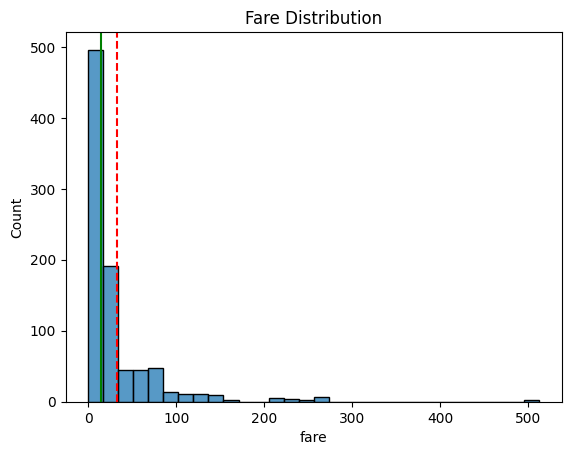

In [10]:
# 5. What is the average fare? What is the median? Which makes more sense to use in this case?
average_fare = titanic['fare'].mean()
median_fare = titanic['fare'].median()
print(f"Average fare: {average_fare:.2f}")
print(f"Median fare: {median_fare:.2f}")    

sns.histplot(titanic['fare'], bins=30)
plt.axvline(average_fare, color='r', linestyle='--')
plt.axvline(median_fare, color='g', linestyle='-')
plt.title('Fare Distribution')  
print("In this case, the median makes more sense due to the skewed distribution of fares. \nThe average can be heavily influenced by a few very high fares, while the median gives a better sense of the typical fare paid.")

## C. Programming Best Practices
1. Write a function `survival_rate(df, column)`. to calculate the survival rate
2. Use list comprehension for ages of survivors.
3. Function to check for missing values.

In [11]:
# 1. Write a function `survival_rate(df, column)`. to calculate the survival rate
def survival_rate(df, column):
    survival_rates = df.groupby(column)['survived'].mean()
    return survival_rates

survival_rate(titanic, ['sex', 'class'])

C:\Users\rka304\AppData\Local\Temp\ipykernel_8424\55531846.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_rates = df.groupby(column)['survived'].mean()


sex     class 
female  First     0.968085
        Second    0.921053
        Third     0.500000
male    First     0.368852
        Second    0.157407
        Third     0.135447
Name: survived, dtype: float64

In [12]:
# 2. Use list comprehension for ages of survivors.
survivor_ages = [age for age in titanic[titanic['survived'] == 1]['age'] if pd.notnull(age)]
print("Ages of survivors:", survivor_ages)

Ages of survivors: [38.0, 26.0, 35.0, 27.0, 14.0, 4.0, 58.0, 55.0, 34.0, 15.0, 28.0, 38.0, 14.0, 3.0, 19.0, 49.0, 29.0, 21.0, 5.0, 38.0, 29.0, 17.0, 32.0, 0.83, 30.0, 29.0, 17.0, 33.0, 23.0, 23.0, 34.0, 21.0, 32.5, 12.0, 24.0, 29.0, 19.0, 22.0, 24.0, 27.0, 22.0, 16.0, 40.0, 9.0, 1.0, 1.0, 4.0, 45.0, 32.0, 19.0, 3.0, 44.0, 58.0, 18.0, 26.0, 16.0, 40.0, 35.0, 31.0, 27.0, 32.0, 16.0, 38.0, 19.0, 35.0, 5.0, 8.0, 24.0, 37.0, 29.0, 30.0, 35.0, 50.0, 3.0, 25.0, 58.0, 35.0, 25.0, 41.0, 63.0, 35.0, 19.0, 30.0, 42.0, 22.0, 26.0, 19.0, 50.0, 0.92, 17.0, 30.0, 24.0, 18.0, 26.0, 24.0, 31.0, 40.0, 30.0, 22.0, 36.0, 36.0, 31.0, 16.0, 41.0, 45.0, 2.0, 24.0, 24.0, 40.0, 3.0, 22.0, 60.0, 24.0, 25.0, 22.0, 42.0, 1.0, 35.0, 36.0, 17.0, 36.0, 21.0, 23.0, 24.0, 28.0, 39.0, 3.0, 33.0, 44.0, 34.0, 18.0, 28.0, 19.0, 32.0, 28.0, 42.0, 14.0, 24.0, 45.0, 28.0, 4.0, 13.0, 34.0, 5.0, 52.0, 49.0, 29.0, 50.0, 48.0, 0.75, 33.0, 23.0, 2.0, 63.0, 25.0, 35.0, 9.0, 54.0, 16.0, 33.0, 26.0, 29.0, 36.0, 54.0, 34.0, 36.0, 30.

In [13]:
# 3. Function to check for missing values.
def check_missing_values(df):
    missing_info = df.isnull().sum()
    return missing_info[missing_info != 0]

check_missing_values(titanic)

age            177
embarked         2
deck           688
embark_town      2
dtype: int64

## D. Data Hygiene & Cleaning
1. Count missing values.
2. Fill missing ages with median.
3. Fill missing embarked with most common.
4. Fill missing deck values with 'Unknown'. Does this group having anything that is incommon with other features? (ie does it seem to be correlated with other covariates)
5. Drop rows with missing fare.

In [14]:
# 1. Count missing values.
missing_values = titanic.isnull().sum()
print("Missing values in each column:")
print(missing_values[missing_values != 0])
print(f"Total missing values : {missing_values.sum()}")

Missing values in each column:
age            177
embarked         2
deck           688
embark_town      2
dtype: int64
Total missing values : 869


In [15]:
# 2. Fill missing ages with median.
median_age = titanic['age'].median()
titanic['age'].fillna(median_age, inplace=True)
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    category
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(3), float64(2), int64(4), object(4)
memory usage: 74.7+ KB


C:\Users\rka304\AppData\Local\Temp\ipykernel_8424\1160400672.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['age'].fillna(median_age, inplace=True)


In [16]:
# 3. Fill missing embarked with most common.
most_common_embarked = titanic['embarked'].mode()[0]
titanic['embarked'].fillna(most_common_embarked, inplace=True)
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    category
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     891 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(3), float64(2), int64(4), object(4)
memory usage: 74.7+ KB


C:\Users\rka304\AppData\Local\Temp\ipykernel_8424\4261017030.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['embarked'].fillna(most_common_embarked, inplace=True)


In [17]:
# 4. Fill missing deck values with 'Unknown'. Does this group having anything that is incommon with other features? (ie does it seem to be correlated with other covariates)
titanic['deck'] = titanic['deck'].cat.add_categories(['Unknown'])
titanic['deck'] = titanic['deck'].fillna('Unknown')

# Select only passengers with 'Unknown' deck
unknown_deck = titanic[titanic['deck'] == 'Unknown']

# (1) Compare class distribution
print("Class distribution for all passengers:")
print(titanic['class'].value_counts())
print("Class distribution for Unknown deck passengers:")
print(unknown_deck['class'].value_counts())

# (2) Compare survival rates
print("Survival rate for all passengers:", titanic['survived'].mean())
print("Survival rate for Unknown deck passengers:", unknown_deck['survived'].mean())

# (3) Compare average fare
print("Average fare for all passengers:", titanic['fare'].mean())
print("Average fare for Unknown deck passengers:", unknown_deck['fare'].mean())


Class distribution for all passengers:
class
Third     491
First     216
Second    184
Name: count, dtype: int64
Class distribution for Unknown deck passengers:
class
Third     479
Second    168
First      41
Name: count, dtype: int64
Survival rate for all passengers: 0.3838383838383838
Survival rate for Unknown deck passengers: 0.29941860465116277
Average fare for all passengers: 32.204207968574636
Average fare for Unknown deck passengers: 19.181079215116277


deck
A          0.466667
B          0.744681
C          0.593220
D          0.757576
E          0.750000
F          0.615385
G          0.500000
Unknown    0.299419
Name: survived, dtype: float64


C:\Users\rka304\AppData\Local\Temp\ipykernel_8424\3483180778.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(titanic.groupby('deck')['survived'].mean())


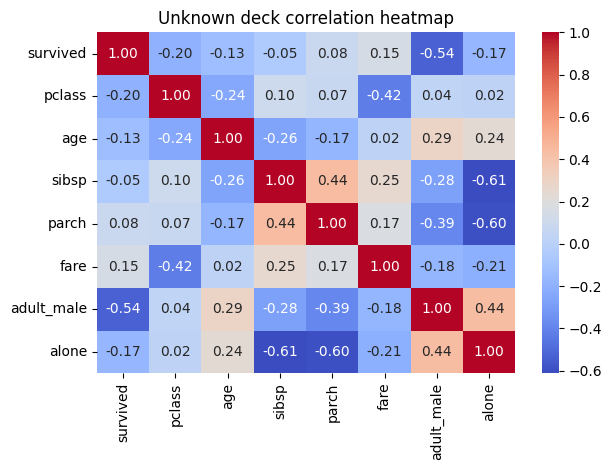

Passengers in the Unknown deck group are mostly third class, pay lower fares, are often adult males, and tend to travel alone. Their survival rate is lower than the overall average. This suggests that those without deck information are likely to be socially and economically disadvantaged, and the general trends in the Titanic data are even stronger in this group.


In [18]:
# (4) Survival rate by deck
print(titanic.groupby('deck')['survived'].mean())

# (5) Correlation heatmap for Unknown deck group (numeric features only)
sns.heatmap(unknown_deck.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Unknown deck correlation heatmap")
plt.tight_layout()
plt.show()

print("Passengers in the Unknown deck group are mostly third class, pay lower fares, are often adult males, and tend to travel alone. Their survival rate is lower than the overall average. This suggests that those without deck information are likely to be socially and economically disadvantaged, and the general trends in the Titanic data are even stronger in this group.")

In [19]:
# 5. Drop rows with missing fare.
titanic.dropna(subset=['fare'], inplace=True)
titanic.info()
# There are no missing values in the 'fare' column since the beginning though.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    category
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     891 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         891 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(3), float64(2), int64(4), object(4)
memory usage: 74.7+ KB


## E. Feature Exploration & Engineering
1. Create `family_size`.
2. Create `is_alone` as an indicator for being alone
3. Create a variable for different age groups
4. Compare survival rates across new features
5. Which variables are the most correlated with survival?
6. Create `fare_per_person`.
7. Create binary `high_fare`. Explain how you determined which fare is "high"

In [20]:
# 1. Create `family_size`.
titanic['family_size'] = titanic['sibsp'] + titanic['parch'] + 1
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,family_size
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Unknown,Southampton,no,False,2
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,2
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Unknown,Southampton,yes,True,1
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,2
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Unknown,Southampton,no,True,1


In [21]:
# 2. Create `is_alone` as an indicator for being alone
titanic['is_alone'] = (titanic['family_size'] == 1).astype(int)
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,family_size,is_alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Unknown,Southampton,no,False,2,0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,2,0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Unknown,Southampton,yes,True,1,1
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,2,0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Unknown,Southampton,no,True,1,1


In [22]:
# 3. Create a variable for different age groups
bins = [0, 12, 20, 35, 60, 80]
labels = ['Child', 'Teenager', 'Young Adult', 'Adult', 'Senior'] 
titanic['age_group'] = pd.cut(titanic['age'], bins=bins, labels=labels, right=False)
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,family_size,is_alone,age_group
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Unknown,Southampton,no,False,2,0,Young Adult
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,2,0,Adult
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Unknown,Southampton,yes,True,1,1,Young Adult
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,2,0,Adult
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Unknown,Southampton,no,True,1,1,Adult


In [23]:
# 4. Compare survival rates across new features
print("Survival rate by family size:")
print(titanic.groupby('family_size')['survived'].mean())
print("\nSurvival rate by is_alone:")

Survival rate by family size:
family_size
1     0.303538
2     0.552795
3     0.578431
4     0.724138
5     0.200000
6     0.136364
7     0.333333
8     0.000000
11    0.000000
Name: survived, dtype: float64

Survival rate by is_alone:


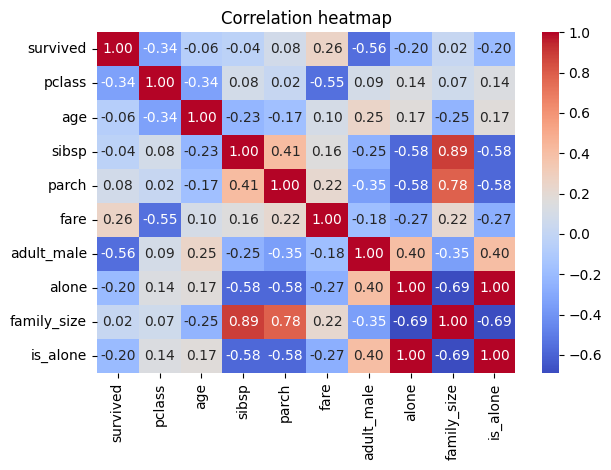

The variable 'adult_male' has the strongest negative correlation with survival, while the variable 'fare' has the strongest positive correlation.


In [24]:
# 5. Which variables are the most correlated with survival?
corr_matrix = titanic.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation heatmap")
plt.tight_layout()
plt.show()
print("The variable 'adult_male' has the strongest negative correlation with survival, while the variable 'fare' has the strongest positive correlation.")

In [25]:
# 6. Create `fare_per_person`.
titanic['fare_per_person'] = titanic['fare'] / titanic['family_size']
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,family_size,is_alone,age_group,fare_per_person
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Unknown,Southampton,no,False,2,0,Young Adult,3.62500
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,2,0,Adult,35.64165
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Unknown,Southampton,yes,True,1,1,Young Adult,7.92500
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,2,0,Adult,26.55000
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Unknown,Southampton,no,True,1,1,Adult,8.05000


In [26]:
# 7. Create binary `high_fare`. Explain how you determined which fare is "high"
# We define "high fare" as fares greater than or equal to the mean fare because of the skewed distribution of fares. The mean gives a sense of overall fare levels, while the median might be too low due to many low-cost tickets.
mean_fare = titanic['fare'].mean()
titanic['high_fare'] = (titanic['fare'] >= mean_fare).astype(int)
print(f"Mean fare: {mean_fare:.2f}")
print(titanic[['fare', 'high_fare']].head())

Mean fare: 32.20
      fare  high_fare
0   7.2500          0
1  71.2833          1
2   7.9250          0
3  53.1000          1
4   8.0500          0


## 6. Visualization & Communication
1. Histogram of ages.
2. Barplot of survival by sex.
3. Boxplot of fare by pclass and survival.
4. Line chart of survival rate across age bins.
5. Make a heatmap for the correltations of the data.
6. Write a 5-sentence summary of findings. If we wanted to predict survival, what variables would we use? 

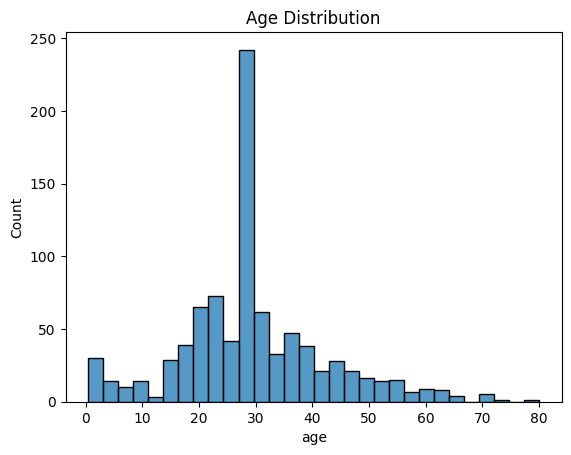

In [27]:
# 1. Histogram of ages.
sns.histplot(titanic['age'], bins=30)
plt.title('Age Distribution')
plt.show()

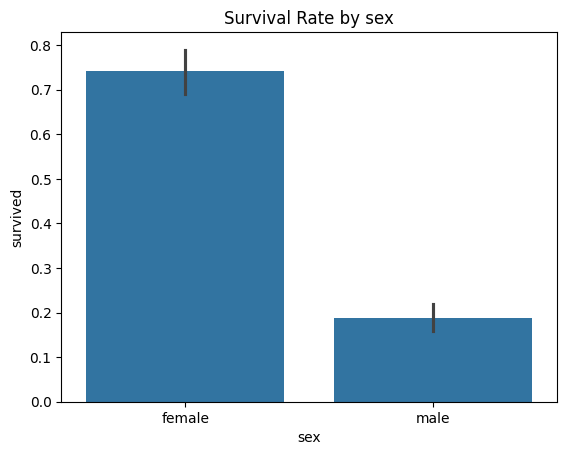

In [28]:
# 2. Barplot of survival by sex.
sns.barplot(titanic, x='sex', y='survived')
plt.title('Survival Rate by sex')
plt.show()

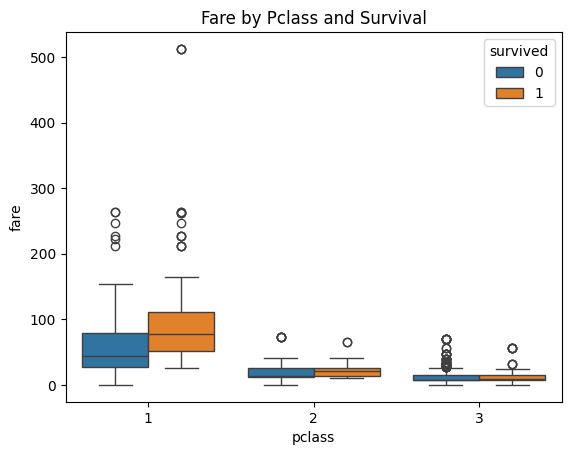

In [29]:
# 3. Boxplot of fare by pclass and survival.
sns.boxplot(data=titanic, x='pclass', y='fare', hue='survived')
plt.title('Fare by Pclass and Survival')
plt.show()

C:\Users\rka304\AppData\Local\Temp\ipykernel_8424\4272777311.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_survival = titanic.groupby(age_bins)['survived'].mean().reset_index()


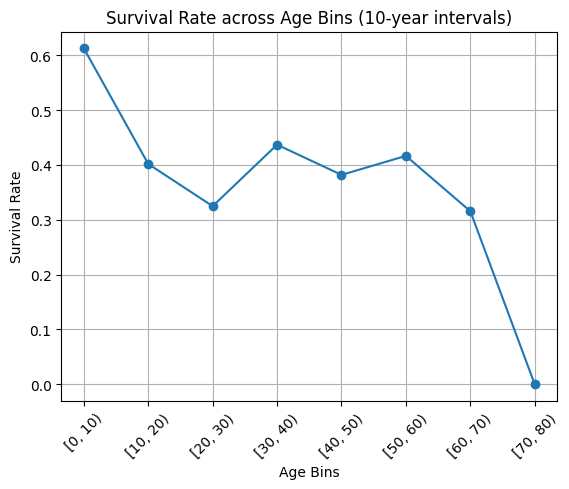

In [30]:
# 4. Line chart of survival rate across age bins
bins = list(range(0, 90, 10)) 
age_bins = pd.cut(titanic['age'], bins=bins, right=False)
age_survival = titanic.groupby(age_bins)['survived'].mean().reset_index()

plt.plot(age_survival['age'].astype(str), age_survival['survived'], marker='o')
plt.title('Survival Rate across Age Bins (10-year intervals)')
plt.xlabel('Age Bins')
plt.ylabel('Survival Rate')
plt.xticks(rotation=45)
plt.grid()
plt.show()

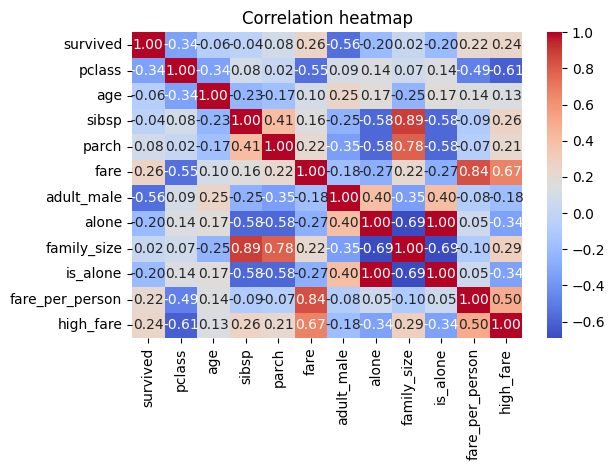

In [31]:
# 5. Make a heatmap for the correltations of the data.
sns.heatmap(titanic.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation heatmap")
plt.tight_layout()
plt.show()

In [32]:
# 6. Write a 5-sentence summary of findings. If we wanted to predict survival, what variables would we use?
print("""Analysis of the Titanic dataset shows that survival rates were strongly influenced by sex, class, and fare. Women and first-class passengers had much higher chances of survival compared to men and those in lower classes. Fare amount and being with family also showed positive associations with survival. Age played a role, with children and younger adults surviving at higher rates than older passengers. If we wanted to predict survival, the most important variables would be sex, class, fare, age, and family-related features such as family size and whether the passenger was alone.""")

Analysis of the Titanic dataset shows that survival rates were strongly influenced by sex, class, and fare. Women and first-class passengers had much higher chances of survival compared to men and those in lower classes. Fare amount and being with family also showed positive associations with survival. Age played a role, with children and younger adults surviving at higher rates than older passengers. If we wanted to predict survival, the most important variables would be sex, class, fare, age, and family-related features such as family size and whether the passenger was alone.
